# Jan 23, 2023

### Set-up

In [1]:
# add import here

# general
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# lab
from fooof import FOOOFGroup

In [25]:
# Settings
PROJECT_PATH = 'G:/Shared drives/v1_v4_1024/'
SESSIONS = ['L_SNR_250717'] # List of sessions to analyze
FS = 500 # sampling frequency (Hz)


#### examine fitting output for an example file

In [31]:
fg = FOOOFGroup()
fg.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP1_array1_LFP.csv")
fg.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 64                             
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

c:\Users\micha\anaconda3\envs\v1v4\lib\site-packages\fooof\objs\group.py:379: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for index, data in enumerate(self.group_results)])


In [36]:
fg_pre = FOOOFGroup()
fg_post = FOOOFGroup()
fg_pre.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP2_array4_LFP_pre.csv")
fg_post.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP2_array4_LFP_post.csv")

Text(0, 0.5, 'Post')

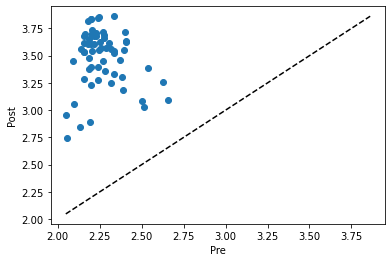

In [37]:
# get exponent
exp_pre = fg_pre.get_params('aperiodic_params', 'exponent')
exp_post = fg_post.get_params('aperiodic_params', 'exponent')

# plot difference in exponent
plt.scatter(exp_pre, exp_post)

# plot unity line
all_exp = np.concatenate((exp_pre, exp_post))
plt.plot([np.min(all_exp), np.max(all_exp)], [np.min(all_exp), np.max(all_exp)], 'k--')

# label axes
plt.xlabel('Pre')
plt.ylabel('Post')

### Aggregate results across all files

In [ ]:
# create pandas DF
params = pd.DataFrame(columns = ['subject', 'array', 'channel', 'pre_exp', 'post_exp', 'pre_r2', 'post_r2'])
params.head()